In [298]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [299]:
df = pd.read_csv('food_toxin_matrix.csv')

In [300]:
df.rename(columns={'Unnamed: 0' : 'species'}, inplace=True)

In [301]:
df.set_index('species', inplace=True)

In [302]:
df.sum(0).head(), df.sum(1).head()

(grape          4
 pumpkin        1
 popsicles      1
 sauces        21
 bruschetta    15
 dtype: int64, species
 bacillus cereus        1281
 bacillus unknown          5
 salmonella                5
 salmonella enterica    3870
 enteropathogenic         44
 dtype: int64)

In [303]:
# target_organisms = ['norovirus', 'salmonella', 'clostridium', 'staphylococcus', 'bacillus', 'escherichia', 'scombroid',
#                     'shiga', 'campylobacter', 'ciguatoxin', 'jejuni', 'vibrio', 'shigella', 'listeria',
#                     'botulinum', 'hepatitis', 'shellfish', 'cyclospora', 'cryptosporidium']

In [304]:
df.drop(['unspecified','other','unknown'], axis=1, inplace=True)

In [305]:
df.drop(['unknown'], inplace=True)

In [306]:
target_foods = df.max().sort_values(ascending=False)[:20].index

In [307]:
target_foods

Index(['salad', 'chicken', 'fish', 'sandwich', 'beef', 'tuna', 'mahi', 'pork',
       'milk', 'rice', 'ground', 'eggs', 'salads', 'oysters', 'turkey',
       'multiple', 'unpasteurized', 'beans', 'raw', 'ice'],
      dtype='object')

In [308]:
target_species = df.max(axis=1).sort_values(ascending=False)[:12].index

In [309]:
df = df.loc[target_species,target_foods]

In [310]:
df = df.sort_values('species')

In [311]:
df = df.reindex(sorted(df.columns), axis=1)

In [312]:
df.head()

,beans,beef,chicken,eggs,fish,ground,ice,mahi,milk,multiple,oysters,pork,raw,rice,salad,salads,sandwich,tuna,turkey,unpasteurized
species,,,,,,,,,,,,,,,,,,,,
bacillus cereus,38,36,82,0,3,7,5,2,0,12,0,19,0,130,17,6,12,2,12,0
campylobacter jejuni,1,11,41,0,3,3,1,0,131,0,2,1,28,2,16,1,3,1,6,80
ciguatoxin,0,0,0,1,232,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
clostridium perfringens,79,190,159,0,3,31,3,2,0,16,0,70,0,48,18,6,15,1,65,0
escherichia coli,4,133,12,0,1,110,4,0,35,6,0,5,10,2,37,9,12,0,1,31


In [313]:
all_foods = df.sum(axis=1)

In [315]:
all_diseases = df.sum()

In [318]:
df_disease_given_food = df / all_diseases

In [321]:
df_disease_given_food.head()

,beans,beef,chicken,eggs,fish,ground,ice,mahi,milk,multiple,oysters,pork,raw,rice,salad,salads,sandwich,tuna,turkey,unpasteurized
species,,,,,,,,,,,,,,,,,,,,
bacillus cereus,0.208791,0.049587,0.101360,0.000000,0.006085,0.018919,0.032051,0.014085,0.000000,0.068571,0.00000,0.061489,0.000000,0.467626,0.023192,0.032258,0.031008,0.008734,0.049383,0.000000
campylobacter jejuni,0.005495,0.015152,0.050680,0.000000,0.006085,0.008108,0.006410,0.000000,0.572052,0.000000,0.01227,0.003236,0.123348,0.007194,0.021828,0.005376,0.007752,0.004367,0.024691,0.473373
ciguatoxin,0.000000,0.000000,0.000000,0.008403,0.470588,0.000000,0.000000,0.014085,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
clostridium perfringens,0.434066,0.261708,0.196539,0.000000,0.006085,0.083784,0.019231,0.014085,0.000000,0.091429,0.00000,0.226537,0.000000,0.172662,0.024557,0.032258,0.038760,0.004367,0.267490,0.000000
escherichia coli,0.021978,0.183196,0.014833,0.000000,0.002028,0.297297,0.025641,0.000000,0.152838,0.034286,0.00000,0.016181,0.044053,0.007194,0.050477,0.048387,0.031008,0.000000,0.004115,0.183432


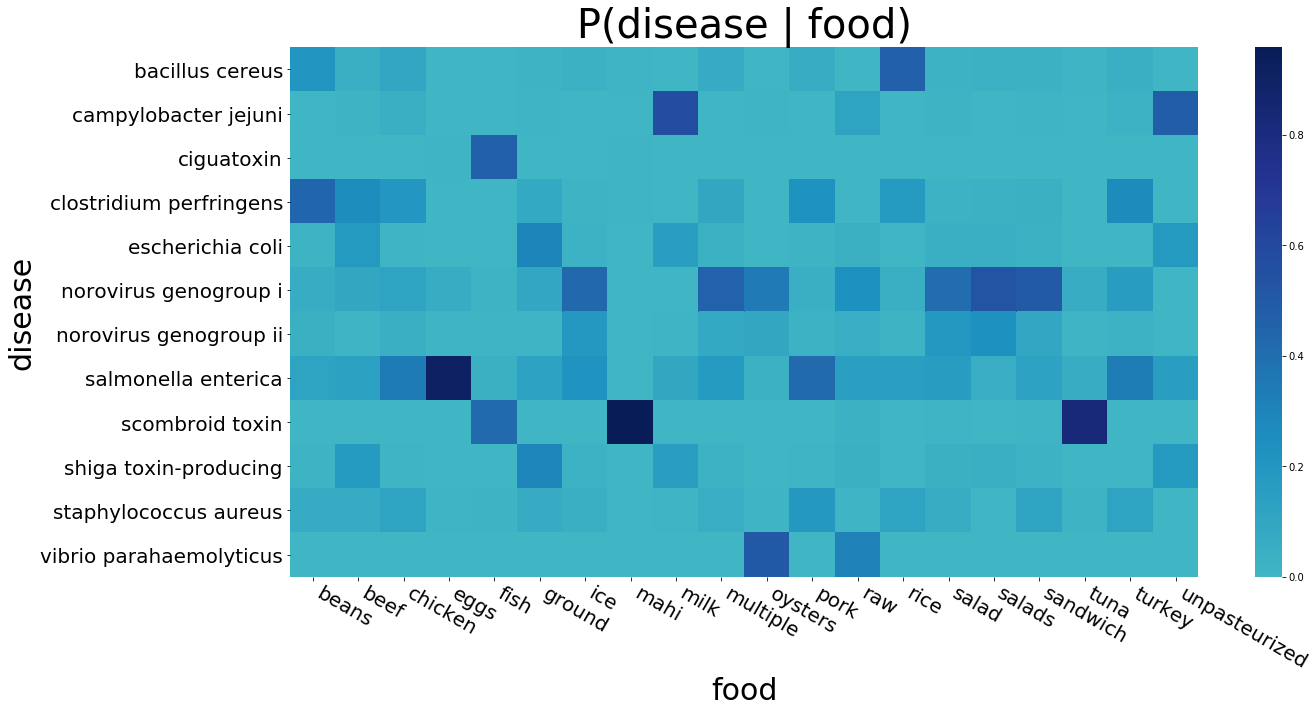

In [323]:
fig,ax=plt.subplots(figsize=(20,10))
ax = sns.heatmap(df_disease_given_food, center=0, cmap="YlGnBu")
ax.set_ylabel('disease', size=30)
ax.set_xlabel('food', size=30)
ax.set_title('P(disease | food)', size=40)
plt.xticks(fontsize=20, rotation=-30, ha='left')
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('figures/disease_given_food');

In [324]:
df = df.T

In [325]:
all_foods = df.sum()

In [326]:
all_diseases = df.sum(axis=1)

In [327]:
# e.g. P(salad | norovirus)

In [328]:
df_food_given_disease = df / all_foods

In [329]:
df_food_given_disease.dropna(axis=1, inplace=True)

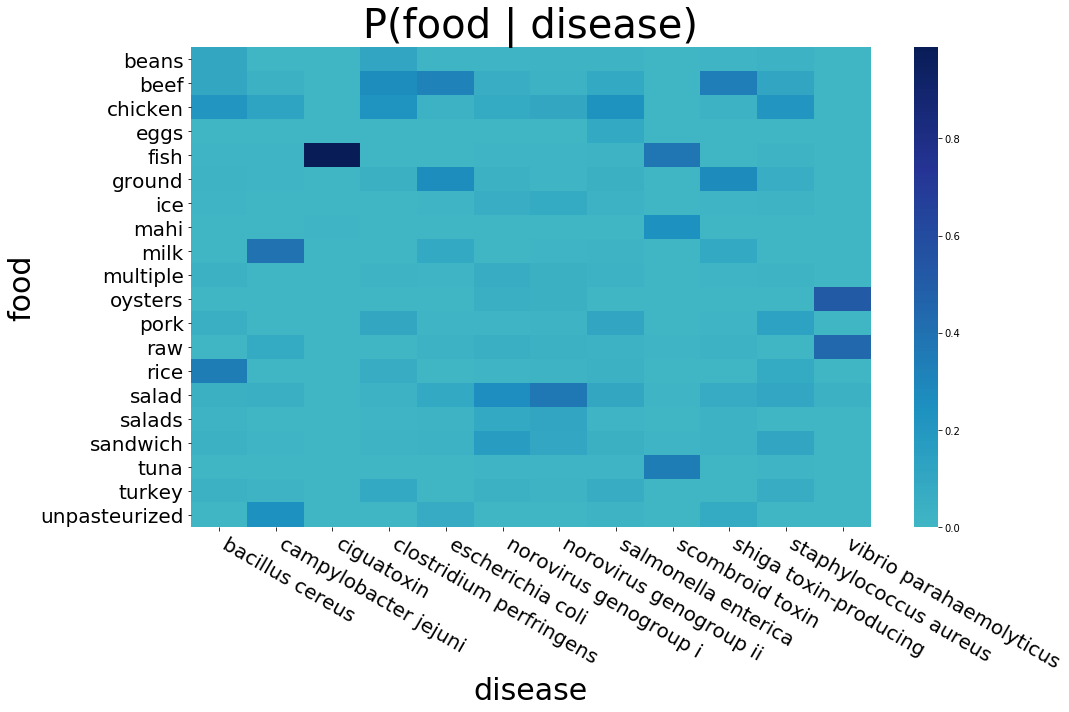

In [331]:
fig,ax=plt.subplots(figsize=(15,10))
ax = sns.heatmap(df_food_given_disease, center=0, cmap="YlGnBu")
ax.set_ylabel('food', size=30)
ax.set_xlabel('disease', size=30)
ax.set_title('P(food | disease)', size=40)
plt.xticks(fontsize=20, rotation=-30, ha='left')
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig('figures/food_given_disease');